In [1]:
import cv2
import pandas as pd
import numpy as np
import os
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt

In [2]:
player_tracking = pd.read_csv('train_player_tracking.csv')
video_metadata = pd.read_csv('train_video_metadata.csv')
labels = pd.read_csv('train_labels.csv')
baseline_helments = pd.read_csv('train_baseline_helmets.csv')

In [3]:
 x, w, y, h = 631, 26, 404, 25
img = cv2.imread('train/frames/58168_003392_Endzone_10.jpg')
img_new = np.zeros((256, 256), dtype=np.float32)
img = img[int(y+h/2)-128:int(y+h/2)+128,int(x+w/2)-128:int(x+w/2)+128].copy()
img_resized=resize(img,(150,150,3))
# img_new[:img.shape[0], :img.shape[1]] = img
# = img1
print(img_resized.shape)

# img_new[:img.shape1[0], :img.shape1[1]] = img1

(150, 150, 3)


In [4]:
player_tracking.head()

,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
0,58580_001136,58580,1136,44830,2021-10-10T21:08:20.900Z,-108,away,CB,22,61.59,42.60,1.11,0.11,320.33,263.93,0.71,-0.64
1,58580_001136,58580,1136,47800,2021-10-10T21:08:20.900Z,-108,away,DE,97,59.48,26.81,0.23,0.01,346.84,247.16,1.29,0.90
2,58580_001136,58580,1136,52444,2021-10-10T21:08:20.900Z,-108,away,FS,29,72.19,31.46,0.61,0.06,11.77,247.69,0.63,-0.33
3,58580_001136,58580,1136,46206,2021-10-10T21:08:20.900Z,-108,home,TE,86,57.37,22.12,0.37,0.04,127.85,63.63,0.69,0.62
4,58580_001136,58580,1136,52663,2021-10-10T21:08:20.900Z,-108,away,ILB,48,63.25,27.50,0.51,0.05,183.62,253.71,0.31,0.31


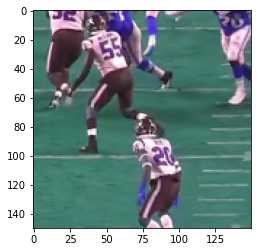

In [5]:
plt.imshow(img_resized)
plt.show()

In [6]:
# player_tracking[player_tracking['game_play'] == '58168_003392']

In [7]:
# video = cv2.VideoCapture('./train/58168_003392_Endzone.mp4')
# fps = video.get(cv2.CAP_PROP_FPS)
# print(fps)

In [8]:
labels.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0


In [9]:
labels[labels["game_play"] == '58168_003392']['step'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69], dtype=int64)

In [10]:
step = labels[labels["game_play"] == '58168_003392'].sort_values(by='step')

In [11]:
video_metadata[video_metadata["game_play"] == '58168_003392']

,game_play,game_key,play_id,view,start_time,end_time,snap_time
0,58168_003392,58168,3392,Endzone,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z
1,58168_003392,58168,3392,Sideline,2020-09-11T03:01:43.134Z,2020-09-11T03:01:54.971Z,2020-09-11T03:01:48.134Z


In [12]:
# baseline_helments[baseline_helments["game_play"] == '58582_003121']['frame'].unique()

In [13]:
# labels['step'].unique()

In [14]:
# print(labels[labels['game_play'] == '58168_003392']['step'].unique())
print(labels[labels['game_play'] == '58582_003121']['step'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]


In [15]:
# labels_58168_003392 = 
#58582_003121
# contact_details = labels[labels['game_play'] == '58582_003121'][['game_play','step','contact']].drop_duplicates()

In [16]:
# contact_details

In [17]:
# contact_frames = contact_details[contact_details['contact'] == 1]['step'].unique()

In [18]:
# contact_frames.shape

In [19]:
# d = {}
# for frame in contact_frames:
#     d[frame] = 1

In [20]:
# vidcap = cv2.VideoCapture('train/58168_003392_Endzone.mp4')
# success,image = vidcap.read()
# counter = 0
# target = 0
# num = 0
# dirname = 'train/frames'
# while success:
#     if counter == target:
#         cv2.imwrite(os.path.join(dirname,"frame%d.jpg" % (num)), image)     # save frame as JPEG file      
#         success,image = vidcap.read()
#         print('Read a new frame: ', success)
#         counter = 6
#         num += 6
#     else: 
#         ret = vidcap.grab() 
#         counter -= 1 

# print(count)

In [21]:
# labels[labels['game_play'] == '58168_003392']['step'].unique()

In [22]:
vidcap = cv2.VideoCapture('train/58168_003392_Endzone.mp4')
int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
# int(vidcap.get(cv2.CAP_PROP_POS_MSEC))

711

In [23]:
# import os
# print(os.listdir('train'))

In [24]:
##Video frame capture from 5s and after at 1s interval after that
##Only run first time

# import os

# dirname = "train/frames/"
# def getFrame(sec,name,step): 
#     vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
# #     print(sec)
#     hasFrames,image = vidcap.read() 
# #     print(image)
#     name = name.replace('.mp4', '')
#     if hasFrames: 
# #         if(sec < 5):
# #             return hasFrames
#         cv2.imwrite(os.path.join(dirname, name + "_" + str(step) +".jpg"), image)     # save frame as JPG file 
# #     cv2.imwrite(os.path.join(dirname,"58168_003392_Endzone_frame_"+str(step).jpg"), image)
#     return hasFrames 

# for filename in os.listdir('train'):
#     f = os.path.join('train', filename)
#     # checking if it is a file
#     if os.path.isfile(f):
#         name = f.split('\\')[1]
#         if('Endzone' in f or 'Sideline' in f):
#             print(f)
#             vidcap = cv2.VideoCapture(f)
# #             print(int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)))
#             sec = 5
#             step = 0
#             frameRate = 1 #it will capture image in each 1 second 
#             success = getFrame(sec,name,step)
#             while success:
#                 step += 10
#                 sec = sec + frameRate 
#                 sec = round(sec, 2)
#             #     print(sec)
#                 success = getFrame(sec,name,step)
# #             break

In [25]:
# vidcap = cv2.VideoCapture('train/58582_003121_Endzone.mp4')
# dirname = "train/frames/"
# def getFrame(sec): 
#     vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
# #     print(sec)
#     hasFrames,image = vidcap.read() 
#     print(image)
#     if hasFrames: 
#         if(sec < 5):
#             return hasFrames
#         cv2.imwrite(os.path.join(dirname,"58168_003392_Endzone_frame_"+str(sec)+" sec.jpg"), image)     # save frame as JPG file 
# #     cv2.imwrite(os.path.join(dirname,"58168_003392_Endzone_frame_"+str(step).jpg"), image)
#     return hasFrames 
# sec = 0
# step = 0
# frameRate = 0.1 #//it will capture image in each 0.1 second 
# success = getFrame(sec)
# while success:
#     step += 1
#     sec = sec + frameRate 
#     sec = round(sec, 2)
# #     print(sec)
#     success = getFrame(sec)

In [26]:
l1 = labels[['game_play','step','nfl_player_id_1','nfl_player_id_2','contact']]

In [27]:
l1

,game_play,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392,0,38590,43854,0
1,58168_003392,0,38590,41257,0
2,58168_003392,0,38590,41944,0
3,58168_003392,0,38590,42386,0
4,58168_003392,0,38590,47944,0
...,...,...,...,...,...
4721613,58582_003121,91,48220,G,0
4721614,58582_003121,91,47906,G,0
4721615,58582_003121,91,38557,G,0
4721616,58582_003121,91,47872,G,0


In [28]:
l1 = l1[l1['nfl_player_id_2'] != 'G']

In [29]:
l1['nfl_player_id_2']=l1['nfl_player_id_2'].astype(int)

C:\Users\RADHIK~1\AppData\Local\Temp/ipykernel_23540/45519913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l1['nfl_player_id_2']=l1['nfl_player_id_2'].astype(int)


In [30]:
# player_tracking

In [31]:
inner_merge_1 = pd.merge(l1, player_tracking, how='left', left_on=['game_play','step','nfl_player_id_1'], right_on = ['game_play','step','nfl_player_id'])

In [32]:
# inner_preprocess1 = inner_merge_1.drop(columns = ['game_key','play_id','nfl_player_id','datetime','team','position','jersey_number'])

inner_preprocess1 = inner_merge_1.drop(columns = ['game_key','play_id','nfl_player_id','datetime','position'])

In [33]:
inner_preprocess1.rename(columns={'x_position': 'x_position_1', 'y_position': 'y_position_1', 'speed': 'speed_1', 'direction': 'direction_1', 'distance': 'distance_1', 'orientation': 'orientation_1', 'acceleration': 'acceleration_1', 'sa': 'sa_1', 'team': 'team_1', 'jersey_number': 
                                'jersey_number1'}, inplace=True)

In [34]:
inner_preprocess1

,game_play,step,nfl_player_id_1,nfl_player_id_2,contact,team_1,jersey_number1,x_position_1,y_position_1,speed_1,distance_1,direction_1,orientation_1,acceleration_1,sa_1
0,58168_003392,0,38590,43854,0,home,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
1,58168_003392,0,38590,41257,0,home,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
2,58168_003392,0,38590,41944,0,home,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
3,58168_003392,0,38590,42386,0,home,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
4,58168_003392,0,38590,47944,0,home,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310980,58582_003121,91,47872,52493,0,away,58,62.63,42.98,1.60,0.16,163.51,121.08,0.99,0.32
4310981,58582_003121,91,47872,52500,0,away,58,62.63,42.98,1.60,0.16,163.51,121.08,0.99,0.32
4310982,58582_003121,91,47872,48220,0,away,58,62.63,42.98,1.60,0.16,163.51,121.08,0.99,0.32
4310983,58582_003121,91,47872,47906,0,away,58,62.63,42.98,1.60,0.16,163.51,121.08,0.99,0.32


In [35]:
# player_tracking

In [36]:
inner_merge_2 = pd.merge(inner_preprocess1, player_tracking, how='left', left_on=['game_play','step','nfl_player_id_2'], right_on = ['game_play','step','nfl_player_id'])

In [37]:
# inner_preprocess2 = inner_merge_2.drop(columns = ['game_key','play_id','nfl_player_id','datetime','team','position','jersey_number'])

inner_preprocess2 = inner_merge_2.drop(columns = ['game_key','play_id','nfl_player_id','datetime','position'])

In [38]:
inner_preprocess2.rename(columns={'x_position': 'x_position_2', 'y_position': 'y_position_2', 'speed': 'speed_2', 'direction': 'direction_2', 'distance': 'distance_2', 'orientation': 'orientation_2', 'acceleration': 'acceleration_2', 'sa': 'sa_2', 'team': 'team_2', 'jersey_number': 
                                'jersey_number2'}, inplace=True)

In [39]:
inner_preprocess2

,game_play,step,nfl_player_id_1,nfl_player_id_2,contact,team_1,jersey_number1,x_position_1,y_position_1,speed_1,...,team_2,jersey_number2,x_position_2,y_position_2,speed_2,distance_2,direction_2,orientation_2,acceleration_2,sa_2
0,58168_003392,0,38590,43854,0,home,70,40.33,25.28,0.52,...,away,57,41.99,16.79,0.74,0.06,263.92,294.74,1.74,1.74
1,58168_003392,0,38590,41257,0,home,70,40.33,25.28,0.52,...,away,21,45.77,15.59,0.67,0.07,180.38,270.88,0.34,0.08
2,58168_003392,0,38590,41944,0,home,70,40.33,25.28,0.52,...,away,92,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81
3,58168_003392,0,38590,42386,0,home,70,40.33,25.28,0.52,...,away,55,45.87,23.89,0.61,0.06,221.19,269.45,1.11,1.10
4,58168_003392,0,38590,47944,0,home,70,40.33,25.28,0.52,...,away,94,42.10,26.58,0.20,0.03,240.11,266.04,1.63,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310980,58582_003121,91,47872,52493,0,away,58,62.63,42.98,1.60,...,away,32,65.04,38.68,1.31,0.14,168.40,143.47,0.74,-0.69
4310981,58582_003121,91,47872,52500,0,away,58,62.63,42.98,1.60,...,home,13,58.74,40.11,1.34,0.13,204.96,136.56,1.23,-1.20
4310982,58582_003121,91,47872,48220,0,away,58,62.63,42.98,1.60,...,home,65,33.18,25.26,2.55,0.26,95.39,152.22,0.43,-0.40
4310983,58582_003121,91,47872,47906,0,away,58,62.63,42.98,1.60,...,home,72,38.25,30.44,3.48,0.38,80.44,62.11,1.54,-1.54


In [40]:
one_sec_frames = inner_preprocess2[inner_preprocess2['step'] % 10 == 0]

In [41]:
one_sec_frames['step'].unique()

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170], dtype=int64)

In [42]:
one_sec_frames

,game_play,step,nfl_player_id_1,nfl_player_id_2,contact,team_1,jersey_number1,x_position_1,y_position_1,speed_1,...,team_2,jersey_number2,x_position_2,y_position_2,speed_2,distance_2,direction_2,orientation_2,acceleration_2,sa_2
0,58168_003392,0,38590,43854,0,home,70,40.33,25.28,0.52,...,away,57,41.99,16.79,0.74,0.06,263.92,294.74,1.74,1.74
1,58168_003392,0,38590,41257,0,home,70,40.33,25.28,0.52,...,away,21,45.77,15.59,0.67,0.07,180.38,270.88,0.34,0.08
2,58168_003392,0,38590,41944,0,home,70,40.33,25.28,0.52,...,away,92,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81
3,58168_003392,0,38590,42386,0,home,70,40.33,25.28,0.52,...,away,55,45.87,23.89,0.61,0.06,221.19,269.45,1.11,1.10
4,58168_003392,0,38590,47944,0,home,70,40.33,25.28,0.52,...,away,94,42.10,26.58,0.20,0.03,240.11,266.04,1.63,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310749,58582_003121,90,47872,52493,0,away,58,62.58,43.13,1.57,...,away,32,65.01,38.81,1.33,0.16,166.54,136.82,0.45,-0.13
4310750,58582_003121,90,47872,52500,0,away,58,62.58,43.13,1.57,...,home,13,58.80,40.24,1.50,0.15,206.60,137.36,0.89,-0.89
4310751,58582_003121,90,47872,48220,0,away,58,62.58,43.13,1.57,...,home,65,32.92,25.29,2.52,0.25,94.76,150.41,0.39,-0.06
4310752,58582_003121,90,47872,47906,0,away,58,62.58,43.13,1.57,...,home,72,37.88,30.39,3.49,0.36,79.33,64.09,1.61,-1.61


In [43]:
one_sec_frames['contact'].value_counts()

0    451024
1      4823
Name: contact, dtype: int64

In [44]:
test_frames = one_sec_frames.copy()

In [45]:
test_frames

,game_play,step,nfl_player_id_1,nfl_player_id_2,contact,team_1,jersey_number1,x_position_1,y_position_1,speed_1,...,team_2,jersey_number2,x_position_2,y_position_2,speed_2,distance_2,direction_2,orientation_2,acceleration_2,sa_2
0,58168_003392,0,38590,43854,0,home,70,40.33,25.28,0.52,...,away,57,41.99,16.79,0.74,0.06,263.92,294.74,1.74,1.74
1,58168_003392,0,38590,41257,0,home,70,40.33,25.28,0.52,...,away,21,45.77,15.59,0.67,0.07,180.38,270.88,0.34,0.08
2,58168_003392,0,38590,41944,0,home,70,40.33,25.28,0.52,...,away,92,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81
3,58168_003392,0,38590,42386,0,home,70,40.33,25.28,0.52,...,away,55,45.87,23.89,0.61,0.06,221.19,269.45,1.11,1.10
4,58168_003392,0,38590,47944,0,home,70,40.33,25.28,0.52,...,away,94,42.10,26.58,0.20,0.03,240.11,266.04,1.63,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310749,58582_003121,90,47872,52493,0,away,58,62.58,43.13,1.57,...,away,32,65.01,38.81,1.33,0.16,166.54,136.82,0.45,-0.13
4310750,58582_003121,90,47872,52500,0,away,58,62.58,43.13,1.57,...,home,13,58.80,40.24,1.50,0.15,206.60,137.36,0.89,-0.89
4310751,58582_003121,90,47872,48220,0,away,58,62.58,43.13,1.57,...,home,65,32.92,25.29,2.52,0.25,94.76,150.41,0.39,-0.06
4310752,58582_003121,90,47872,47906,0,away,58,62.58,43.13,1.57,...,home,72,37.88,30.39,3.49,0.36,79.33,64.09,1.61,-1.61


In [46]:
helmets = baseline_helments[(baseline_helments['frame'] -290) % 60 == 0]

In [47]:
helmets

,game_play,game_key,play_id,view,video,frame,nfl_player_id,player_label,left,width,top,height
0,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,39947,H72,946,25,293,34
1,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,37211,H42,151,25,267,33
2,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,38590,H70,810,25,293,35
3,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,44822,H15,681,26,254,33
4,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,290,41944,V92,680,23,303,33
...,...,...,...,...,...,...,...,...,...,...,...,...
3783407,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,830,52493,V32,918,22,347,26
3783408,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,830,47872,V58,744,19,241,26
3783409,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,830,52500,H13,512,23,310,24
3783410,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,830,46105,V53,563,25,383,23


In [48]:
helmets['frame'] = helmets['frame'].map(lambda x: int((x-290) / 6))

C:\Users\RADHIK~1\AppData\Local\Temp/ipykernel_23540/638430453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helmets['frame'] = helmets['frame'].map(lambda x: int((x-290) / 6))


In [49]:
helmets

,game_play,game_key,play_id,view,video,frame,nfl_player_id,player_label,left,width,top,height
0,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,0,39947,H72,946,25,293,34
1,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,0,37211,H42,151,25,267,33
2,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,0,38590,H70,810,25,293,35
3,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,0,44822,H15,681,26,254,33
4,58168_003392,58168,3392,Endzone,58168_003392_Endzone.mp4,0,41944,V92,680,23,303,33
...,...,...,...,...,...,...,...,...,...,...,...,...
3783407,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,90,52493,V32,918,22,347,26
3783408,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,90,47872,V58,744,19,241,26
3783409,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,90,52500,H13,512,23,310,24
3783410,58582_003121,58582,3121,Sideline,58582_003121_Sideline.mp4,90,46105,V53,563,25,383,23


In [50]:
img_frames = pd.merge(one_sec_frames, helmets, how='inner', left_on=['game_play','step','nfl_player_id_1'], right_on = ['game_play','frame','nfl_player_id']).drop(columns = ['video','frame','play_id','game_key','nfl_player_id'])

In [51]:
img_frames['view'].value_counts()

Sideline    380921
Endzone     305100
Endzone2      1035
Name: view, dtype: int64

In [52]:
img_frames['contact'].value_counts()

0    678227
1      8829
Name: contact, dtype: int64

In [53]:
img_frames = img_frames[img_frames['view'] != 'Endzone2']

In [54]:
img_frames['contact'].value_counts()

0    677207
1      8814
Name: contact, dtype: int64

In [55]:
img_frames_0 = img_frames[img_frames['contact'] == 0].sample(n = 10000, random_state = 18)
img_frames_1 = img_frames[img_frames['contact'] == 1]
img_frame = pd.concat([img_frames_0,img_frames_1])

img_frame

,game_play,step,nfl_player_id_1,nfl_player_id_2,contact,team_1,jersey_number1,x_position_1,y_position_1,speed_1,...,direction_2,orientation_2,acceleration_2,sa_2,view,player_label,left,width,top,height
352469,58336_000203,100,45300,52595,0,away,69,86.31,27.30,4.32,...,10.53,262.80,0.07,0.06,Endzone,V69,1273,7,380,13
8130,58172_003247,120,39109,46273,0,away,85,35.81,2.85,2.33,...,119.67,146.29,1.06,-0.72,Sideline,V85,601,18,317,24
159558,58224_003139,0,43324,52453,0,away,86,83.55,24.82,0.00,...,332.80,76.85,0.13,-0.13,Endzone,V86,1021,24,349,35
458086,58504_002631,30,39950,43341,0,away,65,70.63,33.70,3.98,...,179.60,93.97,2.75,2.75,Endzone,V65,368,24,222,23
611355,58552_000100,0,33084,43313,0,home,2,76.65,23.85,0.08,...,329.60,355.94,3.71,3.60,Endzone,H2,634,24,272,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685304,58582_003121,30,41222,43296,1,home,78,23.71,27.87,2.42,...,293.32,186.68,3.70,-3.66,Sideline,H78,283,10,273,10
685675,58582_003121,40,46121,48220,1,away,57,25.26,22.06,2.11,...,24.14,114.78,1.94,-1.93,Endzone,V57,150,29,108,27
685676,58582_003121,40,46121,48220,1,away,57,25.26,22.06,2.11,...,24.14,114.78,1.94,-1.93,Sideline,V57,249,9,326,9
685868,58582_003121,40,45009,46284,1,away,97,27.27,24.42,1.52,...,8.94,27.59,1.50,-1.16,Endzone,V97,291,30,156,26


In [56]:
# test_frames[(test_frames['game_play'] == '58168_003392') & (test_frames['step'] == 0)]

In [57]:
# baseline_helments

In [58]:
flat_data_arr=[] #input array
target_arr=[] #output array
game_plays =  []
steps = []

In [59]:
##Create frames from the img_frame dataframe

import matplotlib.pyplot as plt
img_frames_0 = img_frames[img_frames['contact'] == 0].sample(n = 10000, random_state = 18)
img_frames_1 = img_frames[img_frames['contact'] == 1]
img_frame = pd.concat([img_frames_0,img_frames_1])
flat_data_arr=[] #input array
for i in img_frame.index:
#     print(img_frames['game_play'][i])
    img_name = img_frames['game_play'][i] + '_' + img_frames['view'][i].replace('2','') + '_' + str(img_frames['step'][i]) + '.jpg'
#     print(img_name)
#     img=imread(os.path.join('train/frames',img_name))
    img = cv2.imread(os.path.join('train/frames',img_name))
    if(img is None):
        img_frame.drop(i, inplace=True)
        continue
    x, w, y, h = img_frames['left'][i] , img_frames['width'][i], img_frames['top'][i], img_frames['height'][i]
#     img = cv2.imread('train/frames/58168_003392_Endzone_10.jpg')
#     img_new = np.zeros((256, 256, 3), dtype=np.float32)

#     img = img[int(y+h/2)-128:int(y+h/2)+128,int(x+w/2)-128:int(x+w/2)+128].copy()
    
#     img = img[y-128:y+128, x-128:x+128]
    M = 128
    N = 128
    x1 = int(x+w/2)
    y1 = int(y+h/2)
    x_start = x1 - N
    x_end = x1 + N
    y_start = y1 - M
    y_end = y1 + M
#     image_copy = img.copy() 
    imgheight=img.shape[0]
    imgwidth=img.shape[1]
    if(x_start < 0):
        diff = 0 - x_start
        x_start = 0
        x_end += diff
    if(x_end >= imgwidth):
        diff = x_end - imgwidth
        x_end = imgwidth
        x_start -= diff
    if(y_start < 0):
        diff = 0 - y_start
        y_start = 0
        y_end += diff
    if(y_end >= imgheight):
        diff = y_end - imgheight
        y_end = imgheight
        y_start -= diff
    img = img[y_start:y_end,x_start:x_end].copy()

#     print(img.shape)
#     img_new[:img.shape[0], :img.shape[1], :img.shape[2]] = img
#     print(img_new.shape)
#     plt.imshow(img)
#     plt.show()
#     print(img.shape)
#     img_resized=resize(img,(150,150,3))
#     img_resized = cv2.resize(img, (150,150), interpolation = cv2.INTER_AREA)
#     new_name = img_frames['game_play'][i] + '_' + img_frames['view'][i].replace('2','') + '_' + str(img_frames['step'][i]) + '_' + img_frames['player_label'][i] + ".jpg"
    new_name = img_frames['game_play'][i] + '_' + img_frames['view'][i].replace('2','') + '_' + str(img_frames['step'][i]) + '_' + img_frames['team_1'][i][0].upper() + str(img_frames['jersey_number1'][i]) + "_" + img_frames['team_2'][i][0].upper() + str(img_frames['jersey_number2'][i]) + ".jpg"
    cv2.imwrite(os.path.join('train/frames/contact_' + str(img_frames['contact'][i]),new_name), img)
    flat_data_arr.append(img_resized.flatten())
#     print(new_name)
#     if(img_name == '58330_000759_Endzone_40.jpg'):
#         break
#     img_new[:img.shape[0], :img.shape[1]] = img
    # = img1
#     print(img_resized.shape)
#     print(img_resized.shape)
#     plt.imshow(img_resized)
#     plt.show()
#     break
    

In [60]:
len(flat_data_arr)

18794

In [61]:
img_frame.to_csv('american_football_contact.csv')

In [65]:
arr = np.array(flat_data_arr)
# np.save('data.npy', arr) # save
# new_num_arr = np.load('data.npy') # load

MemoryError: Unable to allocate 9.45 GiB for an array with shape (18794, 67500) and data type float64

In [314]:
img_frame

,game_play,step,nfl_player_id_1,nfl_player_id_2,contact,x_position_1,y_position_1,speed_1,distance_1,direction_1,...,distance_2,direction_2,orientation_2,acceleration_2,sa_2,view,left,width,top,height
8130,58172_003247,120,39109,46273,0,35.81,2.85,2.33,0.24,178.56,...,0.07,119.67,146.29,1.06,-0.72,Sideline,601,18,317,24
159558,58224_003139,0,43324,52453,0,83.55,24.82,0.00,0.00,345.16,...,0.05,332.80,76.85,0.13,-0.13,Endzone,1021,24,349,35
458086,58504_002631,30,39950,43341,0,70.63,33.70,3.98,0.40,117.15,...,0.16,179.60,93.97,2.75,2.75,Endzone,368,24,222,23
611355,58552_000100,0,33084,43313,0,76.65,23.85,0.08,0.01,99.95,...,0.37,329.60,355.94,3.71,3.60,Endzone,634,24,272,34
602637,58548_003091,60,46211,47885,0,29.38,5.98,0.40,0.04,184.84,...,0.63,113.83,79.72,1.16,0.39,Sideline,429,12,426,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685304,58582_003121,30,41222,43296,1,23.71,27.87,2.42,0.27,293.06,...,0.05,293.32,186.68,3.70,-3.66,Sideline,283,10,273,10
685675,58582_003121,40,46121,48220,1,25.26,22.06,2.11,0.23,61.98,...,0.13,24.14,114.78,1.94,-1.93,Endzone,150,29,108,27
685676,58582_003121,40,46121,48220,1,25.26,22.06,2.11,0.23,61.98,...,0.13,24.14,114.78,1.94,-1.93,Sideline,249,9,326,9
685868,58582_003121,40,45009,46284,1,27.27,24.42,1.52,0.16,126.37,...,0.20,8.94,27.59,1.50,-1.16,Endzone,291,30,156,26


(720, 1280, 3)
(150, 150, 3)


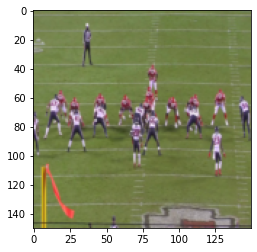

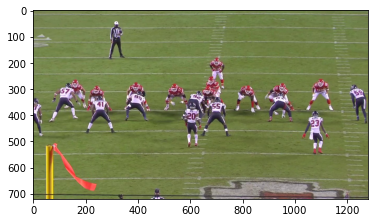

In [191]:
# os.listdir('train/frames')
import matplotlib.pyplot as plt
from PIL import Image
counter = 0
for img in os.listdir('train/frames'):
    d = {}
#     print(img)
    name = img.replace('.jpg', '')
    l = name.split('_')
    view = l[2]
    play = '_'.join(l[:2])
    step = int(l[3])
    
#     (baseline_helments['game_play']) == play & (baseline_helments['frame'] = (290 + step * 6)) & (baseline_helments['view'] = view)
#     print(step)
    game_plays.append(play)
    steps.append(step)
    img_array=imread(os.path.join('train/frames',img))

#     print(img_array)
    img_resized=resize(img_array,(150,150,3))
#     print(img_resized.flatten().shape)
#     img = Image.fromarray(img_array, "RGB")
    print(img_array.shape)
    print(img_resized.shape)
    plt.imshow(img_resized)
    plt.show()
    
    plt.imshow(img_array)
    plt.show()
#     print(img_resized.shape)
    d["game_play"] = play
    d["step"] = step
    d["img"] = img_resized.flatten()
#     flat_data_arr.append(d)
    flat_data_arr.append(img_resized.flatten())
#     target_arr.append(1)
#     break
#     if(d.get(counter, None) is None):
#         target_arr.append(0)
#     else:
#         target_arr.append(1)
    if(counter == 0):
        break
    counter += 1

In [192]:
# flat_data_arr

In [193]:
# images = pd.DataFrame(flat_data_arr)

In [194]:
# images['img'].to_numpy()

In [195]:
print(target_arr)

[]


In [196]:
len(flat_data_arr)

1

In [197]:
# game_plays

In [198]:
flat_data=np.array(flat_data_arr)
# target=np.array(target_arr)
game_plays = np.array(game_plays)
steps = np.array(steps)
df=pd.DataFrame(flat_data) #dataframe
df['game_play'] = game_plays
df['step'] = steps


# df['Target']=target
# df
# x=df.iloc[:,:-1] #input data 
# y=df.iloc[:,-1] #output data

In [199]:
merged = pd.merge(df, test_frames, how='left', left_on=['game_play','step'], right_on = ['game_play','step'])

In [200]:
merged

,0,1,2,3,4,5,6,7,8,9,...,acceleration_1,sa_1,x_position_2,y_position_2,speed_2,distance_2,direction_2,orientation_2,acceleration_2,sa_2
0,0.454902,0.509804,0.305882,0.454902,0.509804,0.309804,0.454902,0.509804,0.305882,0.458824,...,0.59,0.58,41.99,16.79,0.74,0.06,263.92,294.74,1.74,1.74
1,0.454902,0.509804,0.305882,0.454902,0.509804,0.309804,0.454902,0.509804,0.305882,0.458824,...,0.59,0.58,45.77,15.59,0.67,0.07,180.38,270.88,0.34,0.08
2,0.454902,0.509804,0.305882,0.454902,0.509804,0.309804,0.454902,0.509804,0.305882,0.458824,...,0.59,0.58,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81
3,0.454902,0.509804,0.305882,0.454902,0.509804,0.309804,0.454902,0.509804,0.305882,0.458824,...,0.59,0.58,45.87,23.89,0.61,0.06,221.19,269.45,1.11,1.10
4,0.454902,0.509804,0.305882,0.454902,0.509804,0.309804,0.454902,0.509804,0.305882,0.458824,...,0.59,0.58,42.10,26.58,0.20,0.03,240.11,266.04,1.63,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.454902,0.509804,0.305882,0.454902,0.509804,0.309804,0.454902,0.509804,0.305882,0.458824,...,1.97,1.78,40.34,18.08,1.10,0.10,148.93,92.39,2.03,2.03
227,0.454902,0.509804,0.305882,0.454902,0.509804,0.309804,0.454902,0.509804,0.305882,0.458824,...,1.97,1.78,40.35,38.86,0.78,0.08,114.51,64.11,1.21,1.21
228,0.454902,0.509804,0.305882,0.454902,0.509804,0.309804,0.454902,0.509804,0.305882,0.458824,...,1.21,1.21,42.10,26.58,0.20,0.03,240.11,266.04,1.63,1.23
229,0.454902,0.509804,0.305882,0.454902,0.509804,0.309804,0.454902,0.509804,0.305882,0.458824,...,1.21,1.21,43.87,38.73,0.25,0.02,105.59,276.14,0.58,0.58


In [64]:
y = merged['contact']
x = merged.drop(['contact','game_play','step','nfl_player_id_1','nfl_player_id_2'], axis = 1)

In [76]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
# param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
model=svm.SVC(probability=True,max_iter = 1000)
# model=GridSearchCV(svc,param_grid)

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [80]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_train)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_train))
print(f"The model is {accuracy_score(y_pred,y_train)*100}% accurate")

The predicted Data is :
[0 0 0 ... 0 0 0]
The actual data is:
[0 0 0 ... 0 0 0]
The model is 98.57283464566929% accurate


In [82]:
list(y_train)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [89]:
y_train[y_train == 1]

2413    1
2462    1
1951    1
2028    1
334     1
1852    1
1872    1
387     1
281     1
796     1
2259    1
2004    1
1158    1
2129    1
2179    1
845     1
512     1
255     1
588     1
565     1
2205    1
819     1
618     1
717     1
2103    1
642     1
562     1
411     1
2235    1
Name: contact, dtype: int64

In [98]:
flat_data_arr[0].shape

(67500,)